In [19]:
# ✅ Instala las librerías necesarias
!pip install trimesh vedo imageio


Este es el modelo 3D que usaremos, obtenido de: [free3d.com](https://free3d.com/es/modelo-3d/-dolphin-v1--12175.html)

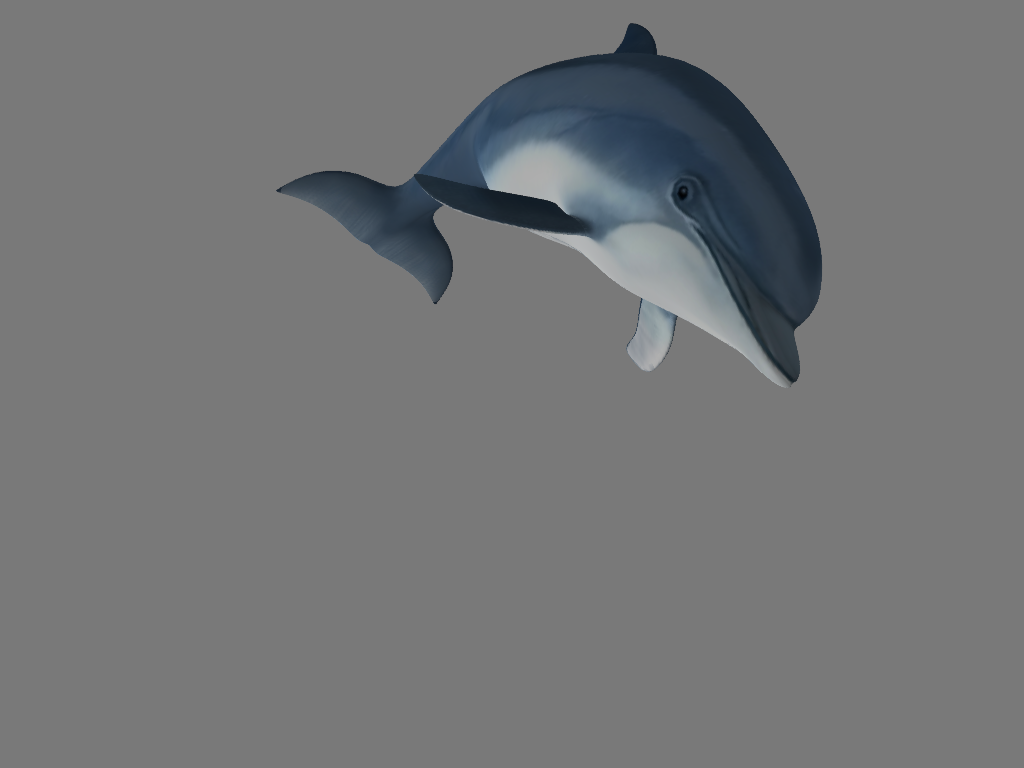

Código:

In [ ]:
# ✅ Importación de librerías
import trimesh                          # Para cargar y analizar modelos 3D (.obj, .stl, .gltf)
from vedo import Mesh, Points, Plotter, show  # Para visualizar y animar mallas en 3D
import imageio                          # Para crear y guardar animaciones (GIFs o videos)

# --- 📁 Cargar modelo 3D ---
file_path = 'modelo.obj'  # Ruta del modelo 3D a cargar (puede ser .obj, .stl, .gltf, etc.)
mesh = trimesh.load(file_path)  # Carga del modelo usando trimesh

# ✅ Mostrar información básica del modelo
print("✅ Modelo cargado correctamente")
print(f"🔹 Vértices: {len(mesh.vertices)}")          # Número de vértices
print(f"🔹 Caras: {len(mesh.faces)}")                # Número de caras
print(f"🔹 Aristas: {len(mesh.edges_unique)}")       # Número de aristas únicas

# --- 🎨 Vista previa con colores distintos por tipo de elemento ---
# Creamos una malla base con color azul claro para las caras
base_mesh = Mesh([mesh.vertices, mesh.faces]).c('lightblue').alpha(1)

# Activamos visualización de aristas como líneas verdes
base_mesh.wireframe(True).linecolor('green')

# Creamos puntos rojos en las posiciones de los vértices
base_points = Points(mesh.vertices, r=10, c='red')  # r = tamaño de punto, c = color

# Mostramos la malla, los puntos y los bordes juntos en una vista interactiva
show(base_mesh, base_points, "Vista previa: Colores distintos", axes=1)

# --- 🎥 Función para crear animación con rotación suave ---
def crear_animacion(mesh, output='rotacion.gif', n_frames=72):
    paso_z = 5       # grados de rotación por frame en el eje Z
    paso_x = 2.5     # grados de rotación por frame en el eje X (más suave)

    # 🧱 Recreamos la malla base con los mismos estilos que antes
    base_mesh = Mesh([mesh.vertices, mesh.faces]).c('lightblue').alpha(1)
    base_mesh.wireframe(True).linecolor('green')
    base_points = Points(mesh.vertices, r=10, c='red')

    # 🔁 Clonamos los objetos para animarlos sin alterar el original
    mesh_rot = base_mesh.clone()
    points_rot = base_points.clone()

    # 🎞️ Creamos un entorno de renderizado sin ventana visible (offscreen)
    vp = Plotter(offscreen=True, size=(600, 600))
    imgs = []  # Lista para guardar las capturas de cada frame

    for _ in range(n_frames):  # Repetimos n_frames veces
        # 🔄 Rotamos el modelo incrementalmente en Z y X
        mesh_rot.rotate(paso_z, axis=(0, 0, 1))
        mesh_rot.rotate(paso_x, axis=(1, 0, 0))
        points_rot.rotate(paso_z, axis=(0, 0, 1))
        points_rot.rotate(paso_x, axis=(1, 0, 0))

        # 📸 Renderizamos la escena y tomamos una captura
        vp.show(mesh_rot, points_rot, axes=0, bg='black')
        img = vp.screenshot(asarray=True)
        imgs.append(img)  # Guardamos la imagen del frame

    # 💾 Guardamos todas las imágenes como un GIF animado
    imageio.mimsave(output, imgs, fps=5)
    print(f"✅ Animación guardada como {output}")

# --- ▶️ Ejecutamos la animación rotatoria ---
crear_animacion(mesh)

✅ Modelo cargado correctamente
🔹 Vértices: 7338
🔹 Caras: 14672
🔹 Aristas: 22008
